In [1]:
import numpy as np
import pynimation.draw
from pynimation.color import (
    RED, BLUE, PURPLE, LIGHT_GRAY, DARK_GRAY, DARK_GREEN, WHITE, TRANSPARENT,
    Color,
)
import tvx
import tvx.utils

In [2]:
ramp = tvx.ramp(f0=0, f1=1, x0=1, width=1)
sinusoid = tvx.utils.sine_wave(frequency=2)

total = ramp + sinusoid
product = ramp * sinusoid

f = (-3 * ramp + 1.5) + sinusoid / 4

sqrt_ramp = tvx.sqrt(ramp)

upper = tvx.max(ramp, sinusoid)

sign = sinusoid >= 0

In [3]:
ramp(0.5), ramp(1.5), ramp(2.5)

(0.0, 0.5, 1.0)

In [4]:
[(t, ramp(t)) for t in np.linspace(0.0, 3.0, 7)]

[(0.0, 0.0),
 (0.5, 0.0),
 (1.0, 0.0),
 (1.5, 0.5),
 (2.0, 1.0),
 (2.5, 1.0),
 (3.0, 1.0)]

In [5]:
sinusoid(0.125)

1.0

In [6]:
def my_ramp(t: float):
    if t <= 1.0:
        return 0.0
    if t <= 2.0:
        return t - 1.0
    else:
        return 1.0

def my_sinusoid(t: float) -> float:
    return np.sin(4 * np.pi * t)

my_ramp(0.5), my_ramp(1.5), my_ramp(2.5), my_sinusoid(0.125)

(0.0, 0.5, 1.0, 1.0)

In [7]:
# Uncomment to generate error.
# my_total = my_ramp + my_sinusoid

In [8]:
total(1.375), ramp(1.375), sinusoid(1.375)

(-0.625, 0.375, -1.0)

In [9]:
x, y = 50, 30
width, height = 400, 200
right, bottom = 30, 50
fill_color = Color(0.95, 0.95, 0.95)

p_ramp = pynimation.draw.TvfChartDrawable(
    ramp, title="ramp",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=RED, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(0, 1, 2),
    alpha=0, steps=200
)

p_sinusoid = pynimation.draw.TvfChartDrawable(
    sinusoid, title="sinusoid",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=BLUE, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(-1, 1, 3),
    alpha=0, steps=200
)

p_sum = pynimation.draw.TvfChartDrawable(
    total, title="ramp + sinusoid",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=PURPLE, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(-1, 2, 4),
    alpha=0, steps=200
)

p_prod = pynimation.draw.TvfChartDrawable(
    product, title="ramp * sinusoid", 
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=PURPLE, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(-1, 1, 3),
    alpha=0, steps=200
)

p_f = pynimation.draw.TvfChartDrawable(
    f, title="(-3 * ramp + 1.5) + sinusoid / 4",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=DARK_GREEN, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(-2, 2, 5),
    alpha=0, steps=200
)

p_sqrt = pynimation.draw.TvfChartDrawable(
    sqrt_ramp, title="tvx.sqrt(ramp)",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=RED, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(0, 1, 2),
    alpha=0, steps=200
)

p_upper = pynimation.draw.TvfChartDrawable(
    upper, title="tvx.max(ramp, sinusoid)", 
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=PURPLE, line_width=3,
    time_ticks=range(4),
    value_ticks=np.linspace(-1, 1, 3),
    alpha=0, steps=200
)

p_sign = pynimation.draw.TvfChartDrawable(
    tvx.if_then_else(sign), title="sinusoid >= 0",
    x=x, y=y, width=width, height=height, 
    min_time=0, max_time=3,
    border_color=DARK_GRAY, border_width=2,
    fill_color=fill_color,
    line_color=BLUE, line_width=3,
    time_ticks=range(4),
    alpha=0, steps=width*2
)

In [10]:
b = pynimation.draw.Background(color=TRANSPARENT)

plots = [p_ramp, p_sinusoid, p_sum, p_prod, p_f, p_sqrt, p_upper, p_sign]
b.wait(1)
for p in plots:
    p.wait_for(b)
    p.fade_to(1, 1),
    p.wait(2),
    p.fade_to(0, 1)
    b.wait_for(p)
    b.wait(1)
    
scene = pynimation.draw.Scene(plots, 
                              render_width=x + width + right, 
                              render_height=y + height + bottom)

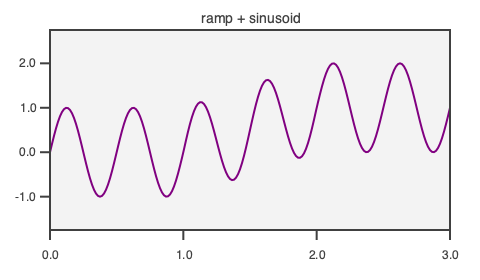

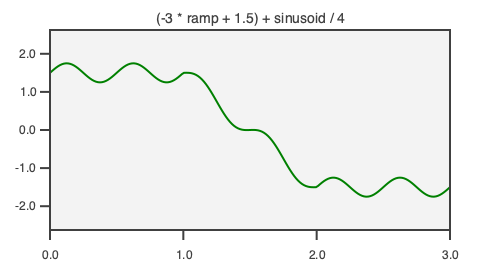

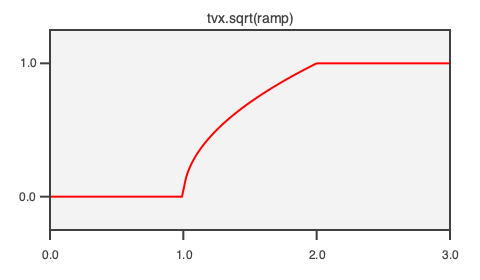

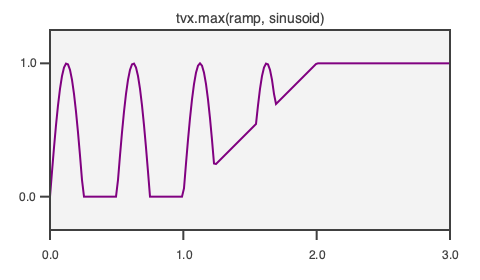

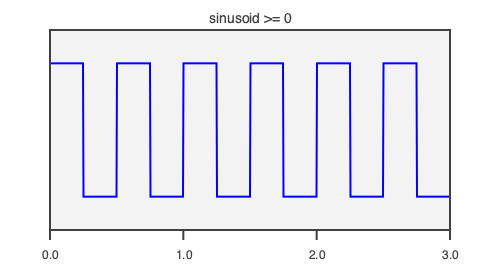

[Scene at 00:04.000,
 Scene at 00:09.000,
 Scene at 00:14.000,
 Scene at 00:19.000,
 Scene at 00:24.000,
 Scene at 00:29.000,
 Scene at 00:34.000,
 Scene at 00:39.000]

In [11]:
snap_range = range(4, 4 + 5 * len(plots), 5)

[scene.at(t) for t in snap_range]

In [12]:
for ii, t in enumerate(snap_range):
    scene.at(t).to_png("/tmp/tvf-{:d}.png".format(ii))